<a href="https://colab.research.google.com/github/SteAmarante/python-data-science/blob/main/aula_08/exercicio_fixacao_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Use o Dataset de taxis

https://raw.githubusercontent.com/mwaskom/seaborn-data/master/taxis.csv

In [106]:
!pip install scikit-learn

In [107]:
# Importar pacotes essenciais
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [108]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/taxis.csv")
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


##1- Leie o dataset e calcule a porcentagem de gorjeta (tip/total), após isso crie um uma coluna chamada “high_tip” que sera condicional binária, preenchida com 1 ou 0, onde 1 será para gorjetas maiores que 20% e 0 para os demais valores;

In [109]:
df['tip_pct'] = df['tip']/df['total']
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,tip_pct
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,0.166023
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,0.000000
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,0.166667
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,0.166441
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,0.082090


In [110]:
df['high_tip'] = 0
df.loc[df['tip_pct'] > 0.2, 'high_tip'] = 1
df.head(50)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,tip_pct,high_tip
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.00,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,0.166023,0
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.00,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,0.000000,0
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.00,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,0.166667,0
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.00,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,0.166441,0
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.00,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,0.082090,0
5,2019-03-11 10:37:23,2019-03-11 10:47:31,1,0.49,7.5,2.16,0.00,12.96,yellow,credit card,Times Sq/Theatre District,Midtown East,Manhattan,Manhattan,0.166667,0
6,2019-03-26 21:07:31,2019-03-26 21:17:29,1,3.65,13.0,2.00,0.00,18.80,yellow,credit card,Battery Park City,Two Bridges/Seward Park,Manhattan,Manhattan,0.106383,0
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.40,8.5,0.00,0.00,11.80,yellow,NaN,Murray Hill,Flatiron,Manhattan,Manhattan,0.000000,0
8,2019-03-23 11:48:50,2019-03-23 12:06:14,1,3.63,15.0,1.00,0.00,19.30,yellow,credit card,East Harlem South,Midtown Center,Manhattan,Manhattan,0.051813,0
9,2019-03-08 16:18:37,2019-03-08 16:26:57,1,1.52,8.0,1.00,0.00,13.30,yellow,credit card,Lincoln Square East,Central Park,Manhattan,Manhattan,0.075188,0


In [111]:
df['high_tip'].value_counts()

,count
high_tip,
0,6127
1,306


##2- Seleciona as colunas de interesse "distance", "fare", "tolls", "passengers", "high_tip“, limpe os vazios;

In [112]:
df = df[['distance', 'fare', 'tolls', 'passengers', 'high_tip']].dropna()
df

,distance,fare,tolls,passengers,high_tip
0,1.60,7.0,0.0,1,0
1,0.79,5.0,0.0,1,0
2,1.37,7.5,0.0,1,0
3,7.70,27.0,0.0,1,0
4,2.16,9.0,0.0,3,0
...,...,...,...,...,...
6428,0.75,4.5,0.0,1,0
6429,18.74,58.0,0.0,1,0
6430,4.14,16.0,0.0,1,0
6431,1.12,6.0,0.0,1,0


##3- Crie um modelo (Regressão Logística e Random Forest) para prever "high_tip“, usando os demais dados;

In [113]:
#Separação treino/teste
x = df[['distance', 'fare', 'tolls', 'passengers']]
y = df['high_tip']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [114]:
# Criar e treinar o modelo Regressão Logística
modelo_lr = LogisticRegression(random_state=42)
modelo_lr.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [115]:
# Fazer previsões de high_tip
y_pred_lr = modelo_lr.predict(x_test)

In [116]:
# Avaliar desempenho LR
print("Acurácia:", accuracy_score(y_test, y_pred_lr))

# Relatório detalhado
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred_lr, target_names=["Gorjeta Baixa", "Gorjeta Alta"]))

Acurácia: 0.9595959595959596

Relatório de Classificação:

               precision    recall  f1-score   support

Gorjeta Baixa       0.96      1.00      0.98      1235
 Gorjeta Alta       0.00      0.00      0.00        52

     accuracy                           0.96      1287
    macro avg       0.48      0.50      0.49      1287
 weighted avg       0.92      0.96      0.94      1287



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [117]:
# Criar e treinar o modelo Randon Forest
modelo_df = RandomForestClassifier(random_state=42)
modelo_df.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [118]:
# Fazer previsões de high_tip
y_pred_df = modelo_df.predict(x_test)

In [119]:
# Avaliar desempenho RF
print("Acurácia:", accuracy_score(y_test, y_pred_df))

# Relatório detalhado
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred_df, target_names=["Gorjeta Baixa", "Gorjeta Alta"]))

Acurácia: 0.9456099456099456

Relatório de Classificação:

               precision    recall  f1-score   support

Gorjeta Baixa       0.96      0.99      0.97      1235
 Gorjeta Alta       0.00      0.00      0.00        52

     accuracy                           0.95      1287
    macro avg       0.48      0.49      0.49      1287
 weighted avg       0.92      0.95      0.93      1287



##4- Avalie a acurácia, precision e recall do modelo;

In [120]:
#Comparação dos resultados Random Forest e LR
print("Acurácia Random Forest:", accuracy_score(y_test, y_pred_df))
print("Acurácia Regressão Lógica:", accuracy_score(y_test, y_pred_lr))

Acurácia Random Forest: 0.9456099456099456
Acurácia Regressão Lógica: 0.9595959595959596


##5- Crie um heatmap com a matrix de confusão.

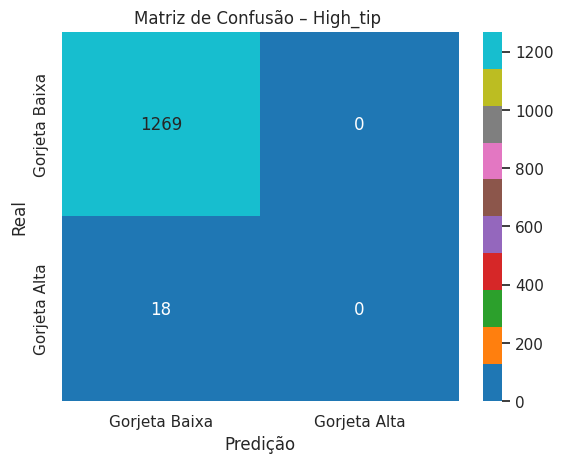

In [121]:
# Matriz de confusão resultados Random Forest e LR
cm = confusion_matrix(y_pred_df, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="tab10",
            xticklabels=["Gorjeta Baixa", "Gorjeta Alta"],
            yticklabels=["Gorjeta Baixa", "Gorjeta Alta"])
plt.xlabel("Predição")
plt.ylabel("Real")
plt.title("Matriz de Confusão – High_tip ")
plt.show()

##6- Analise dos dados utilizados. (Eficiência)

**Análise dos Dados e Eficiência dos Modelos**

Com base nos resultados dos modelos de Regressão Logística e Random Forest para prever gorjetas altas ("high_tip"), podemos analisar a eficiência de cada modelo:

**Regressão Logística:**

*   **Acurácia:** Aproximadamente 96%. Isso indica que o modelo previu corretamente a classe da gorjeta (alta ou baixa) em 96% dos casos. No entanto, como a classe de "gorjeta alta" é minoritária (apenas 306 casos em 6433), uma alta acurácia pode ser enganosa.
*   **Relatório de Classificação:**
    *   **Precision (Gorjeta Alta):** 0.00. Isso significa que, quando o modelo previu "gorjeta alta", ele estava errado em todos os casos.
    *   **Recall (Gorjeta Alta):** 0.00. Isso significa que o modelo não conseguiu identificar nenhum dos casos reais de "gorjeta alta".
    *   **F1-score (Gorjeta Alta):** 0.00. O F1-score é uma média harmônica da precision e recall, e um valor de 0 indica que o modelo não tem bom desempenho na identificação da classe positiva.

**Random Forest:**

*   **Acurácia:** Aproximadamente 94.5%. Similar à Regressão Logística, a alta acurácia é influenciada pela classe majoritária.
*   **Relatório de Classificação:**
    *   **Precision (Gorjeta Alta):** 0.00. Assim como na Regressão Logística, o modelo não conseguiu prever corretamente nenhum caso de "gorjeta alta".
    *   **Recall (Gorjeta Alta):** 0.00. O modelo não identificou nenhum dos casos reais de "gorjeta alta".
    *   **F1-score (Gorjeta Alta):** 0.00. O F1-score também indica um desempenho fraco na identificação da classe positiva.

**Matriz de Confusão:**

A matriz de confusão mostra que ambos os modelos classificaram a grande maioria das instâncias como "Gorjeta Baixa". Nenhum dos modelos previu corretamente qualquer caso de "Gorjeta Alta".

**Conclusão:**

Apesar da alta acurácia aparente, ambos os modelos (Regressão Logística e Random Forest) não foram eficazes em prever gorjetas altas. Isso é provavelmente devido ao desequilíbrio de classes nos dados, onde a classe "high_tip" (gorjeta alta) é muito menos frequente do que a classe "gorjeta baixa".

Para melhorar a capacidade de previsão de gorjetas altas, técnicas de balanceamento de dados (como sobreamostragem da classe minoritária ou subamostragem da classe majoritária) ou o uso de métricas de avaliação mais apropriadas para dados desequilibrados (como a Área Sob a Curva ROC - AUC) podem ser exploradas em análises futuras.